In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
import re

In [2]:
#Definition that reads 311 Complaint Files and saves Complaint Type, Descriptor, Event, 
#and the Complaint Location
#input:file --> output:dataframe with Complaint and Location [In Latitude and Longitude]
def read_311(filename):
    #import the csv
    a = pd.read_csv(filename)
    #save location 
    Lat = a['Latitude']
    Long = a['Longitude']
    #save complaint and information
    Type = a['Complaint Type']
    Descriptor = a['Descriptor']
    Event = a['Location Type']
    #save data in a dictionary 
    d = {'Latitude': Lat, 'Longitude': Long, 'Type': Type, 'Descriptor': Descriptor, 'Event': Event}
    #convert dictionary to a dataframe
    df = pd.DataFrame(data=d)
    #return dataframe
    return df 

In [3]:
#Definition that reads Subway Stop files and saves Location and Line's Available
#input:file --> output:dataframe with Location and Line's Available
def read_Subway(filename):
    #import the csv
    a = pd.read_csv(filename)
    #save location 
    #Uh oh! Location is not cleanly saved as a Latitude and Longitude
    #Instead it is saved as a string... We will fix this.
    Location = a['the_geom']
    #We also have our subway lines saved
    Line = a['LINE']
    #save data in a dictionary 
    d = {'Location':Location, 'Line':Line}
    #convert dictionary to a dataframe
    df = pd.DataFrame(data=d)
    #return dataframe
    return df

In [9]:
#Lets use the functions we just wrote
#Run your file through the 'read' functions to save data. 
#I reccomend labeling this '_raw'

complaints2004_raw = read_311('311_2004.csv')
complaints2009_raw = read_311('311_2009.csv')

subway_raw = read_Subway('Subway.csv')

In [21]:
#What do the data frames look like?
subway_raw

,Line,Location
0,2-5,POINT (-73.86835600032798 40.84916900104506)
1,2-5,POINT (-73.86821300022677 40.84912800131844)
2,2-5,POINT (-73.87349900050798 40.84122300105249)
3,2-5,POINT (-73.8728919997833 40.84145300067447)
4,2-5,POINT (-73.87962300013866 40.84081500075867)
5,2-5,POINT (-73.88000500027815 40.840434000875874)
6,2-5,POINT (-73.87983300021861 40.84035400111976)
7,2-5,POINT (-73.8795549998336 40.84063900116436)
8,2-5,POINT (-73.87939700013239 40.84107800066419)
9,2-5,POINT (-73.88804799985908 40.83732500129732)


In [22]:
complaints2004_raw

,Descriptor,Event,Latitude,Longitude,Type
0,Cabaret License,NaN,NaN,NaN,DCA / DOH New License Application Request
1,Day Auctioneer License,NaN,NaN,NaN,DCA / DOH New License Application Request
2,"No Parking, Standing, Stopping",Street,NaN,NaN,Street Sign - Damaged
3,Stop,Street,40.655670,-73.747161,Street Sign - Damaged
4,Driver Complaint,NaN,NaN,NaN,Taxi Complaint
5,Stop,Street,40.624204,-74.110592,Street Sign - Damaged
6,Smoking Violation,Pool Hall,40.705588,-73.882535,Smoking
7,St Name - Attached to Pole,Street,40.643030,-73.969883,Street Sign - Missing
8,"No Parking, Standing, Stopping",Street,40.775292,-73.953626,Street Sign - Damaged
9,"No Parking, Standing, Stopping",Street,40.676183,-73.944340,Street Sign - Damaged


In [23]:
complaints2009_raw

,Descriptor,Event,Latitude,Longitude,Type
0,HEAT,RESIDENTIAL BUILDING,40.656621,-73.958066,HEATING
1,Smoking Violation,Restaurant/Bar/Deli/Bakery,40.768896,-73.921818,Smoking
2,Controller,NaN,40.635345,-74.016822,Traffic Signal Condition
3,Controller,NaN,40.698378,-73.983050,Traffic Signal Condition
4,Controller,NaN,40.592752,-73.950152,Traffic Signal Condition
5,HEAT,RESIDENTIAL BUILDING,40.682935,-73.837448,HEATING
6,VERMIN,RESIDENTIAL BUILDING,40.657639,-73.950295,NONCONST
7,HEAT,RESIDENTIAL BUILDING,40.695892,-73.907598,HEATING
8,HEAT,RESIDENTIAL BUILDING,40.757194,-73.899102,HEATING
9,HEAT,RESIDENTIAL BUILDING,40.775927,-73.955110,HEATING


In [13]:
#Data frames are handy, we can eliminate an entire row using some simple tricks 
#or in other words an entire line, comlaint type, or any row that is missing a data type.

In [14]:
#Let us focus on 311 complaints frm 2009 first. 

In [15]:
#A definition that only keeps the complaints we wish to view and eliminates all rows
#that does not have the Complaint_Type 'n' we indicate
#input:dataframe --> output:dataframe with only data that matches Complaint Type
def keep_Complaints_Type(df,n):
    #Read the data frame
    Lat = df['Latitude']
    Long = df['Longitude']
    Type = df['Type']
    Descriptor = df['Descriptor']
    Event = df['Event']
    #Define our boolean true if Type == n
    ndx = (Type == n)
    #This boolean acts on all rows and eliminates data that does not have the conditional true
    Lat = Lat[ndx]
    Long = Long[ndx]
    Type = Type[ndx]
    Descriptor = Descriptor[ndx]
    Event = Event[ndx]
    d = {'Latitude': Lat, 'Longitude': Long, 'Type': Type, 'Descriptor': Descriptor, 'Event': Event}
    df = pd.DataFrame(data=d)
    #return the edited datafram
    return df 

In [16]:
#Repeat this for other data variables
#input:dataframe --> output:dataframe with only data that matches Descriptor
def keep_Complaints_Descriptor(df,n):
    Lat = df['Latitude']
    Long = df['Longitude']
    Type = df['Type']
    Descriptor = df['Descriptor']
    Event = df['Event']
    ndx = (Descriptor == n)
    Lat = Lat[ndx]
    Long = Long[ndx]
    Type = Type[ndx]
    Descriptor = Descriptor[ndx]
    Event = Event[ndx]
    d = {'Latitude': Lat, 'Longitude': Long, 'Type': Type, 'Descriptor': Descriptor, 'Event': Event}
    df = pd.DataFrame(data=d)
    return df 

In [17]:
#Can you write a definition that keeps data based on Events?

In [18]:
#We also write a definition that assures the complaint Location is inside of NYC 
def set_range_311(df):
    Lat = df['Latitude']
    Long = df['Longitude']
    Type = df['Type']
    Descriptor = df['Descriptor']
    Event = df['Event']
    
    #The following could be modularized, but for clarity I will leave it this way
    #Can you figure out how to write the following with a loop?
    #Try using a list with min and max!
    ndx = (Lat > 40.69)
    
    Lat = Lat[ndx]
    Long = Long[ndx]
    Type = Type[ndx]
    Descriptor = Descriptor[ndx]
    Event = Event[ndx]
    
    ndx = (Lat < 40.9)
    
    Lat = Lat[ndx]
    Long = Long[ndx]
    Type = Type[ndx]
    Descriptor = Descriptor[ndx]
    Event = Event[ndx]
    
    ndx = (Long > -74.05)
    
    Lat = Lat[ndx]
    Long = Long[ndx]
    Type = Type[ndx]
    Descriptor = Descriptor[ndx]
    Event = Event[ndx]
    
    ndx = (Long < -73.8)
    
    Lat = Lat[ndx]
    Long = Long[ndx]
    Type = Type[ndx]
    Descriptor = Descriptor[ndx]
    Event = Event[ndx]
    
    d = {'Latitude': Lat, 'Longitude': Long, 'Type': Type, 'Descriptor': Descriptor, 'Event': Event}
    df = pd.DataFrame(data=d)
    return df

In [37]:
#Crop data to be in NYC
complaints2009_nyc = set_range_311(complaints2009_raw)
#Let's see how much people complain about Noise coming from Parties!
noisecomplaints_2009_nyc_commercial = keep_Complaints_Type(complaints2009_nyc,'Noise - Commercial')
noisecomplaints_2009_nyc_commercial_bar = keep_Complaints_Descriptor(noisecomplaints_2009_nyc_commercial,'Loud Music/Party')
#rename our data set for ease
noise2009 = noisecomplaints_2009_nyc_commercial_bar

In [38]:
#Now we have all locations of Commercial Noise Complaints coming from Parties in NYC!
noise2009

,Descriptor,Event,Latitude,Longitude,Type
30,Loud Music/Party,Club/Bar/Restaurant,40.766112,-73.965726,Noise - Commercial
252,Loud Music/Party,Club/Bar/Restaurant,40.710523,-73.965787,Noise - Commercial
253,Loud Music/Party,Club/Bar/Restaurant,40.729700,-74.004478,Noise - Commercial
293,Loud Music/Party,Club/Bar/Restaurant,40.775001,-73.980565,Noise - Commercial
297,Loud Music/Party,Club/Bar/Restaurant,40.834079,-73.943012,Noise - Commercial
300,Loud Music/Party,Club/Bar/Restaurant,40.695305,-73.912211,Noise - Commercial
302,Loud Music/Party,Club/Bar/Restaurant,40.715974,-73.833335,Noise - Commercial
339,Loud Music/Party,Club/Bar/Restaurant,40.744471,-73.911507,Noise - Commercial
341,Loud Music/Party,Club/Bar/Restaurant,40.711011,-73.950634,Noise - Commercial
342,Loud Music/Party,Club/Bar/Restaurant,40.806081,-73.965308,Noise - Commercial


In [39]:
#Lets move on to analyzing subways.

In [31]:
#Look at that nasty location description! Don't worry. 
subway_raw

,Line,Location
0,2-5,POINT (-73.86835600032798 40.84916900104506)
1,2-5,POINT (-73.86821300022677 40.84912800131844)
2,2-5,POINT (-73.87349900050798 40.84122300105249)
3,2-5,POINT (-73.8728919997833 40.84145300067447)
4,2-5,POINT (-73.87962300013866 40.84081500075867)
5,2-5,POINT (-73.88000500027815 40.840434000875874)
6,2-5,POINT (-73.87983300021861 40.84035400111976)
7,2-5,POINT (-73.8795549998336 40.84063900116436)
8,2-5,POINT (-73.87939700013239 40.84107800066419)
9,2-5,POINT (-73.88804799985908 40.83732500129732)


In [32]:
#We write a definition that parses the Location of each Subway Stops and 
#Stores Latitude and Longitude of each stop.
def locate_subways(df):
    #read the dataframe
    Location = df['Location']
    Line = df['Line']
    
    #Create empty lists to stroe Latitude and Longitude that are as long as the Dataframe
    Lat = np.zeros(len(Location))
    Long = np.zeros(len(Location))
    
    #Now we parse EACH saved  ex:'POINT (-73.93698100017718 40.82406900082459)'
    for i in range(len(Location)):
        #Match stores each unique number separated by anything as part of a list
    
        match=re.findall('\d+', str(df['Location'][i]))
        #from example 
        #match[0] = 73
        #match[1] = 93698100017718
        #match[2] = 40
        #match[3] = 82406900082459
        
        #convert these numbers into correct representation in a variable
        x=np.float64(match[0])
        y=np.float64(match[1])
        z=np.float64(y*10**(-14))
        Long[i]=-1*(x+z)
        
        x=np.float64(match[2])
        y=np.float64(match[3])
        z=np.float64(y*10**(-14))
        Lat[i]=(x+z)
        
    #return dataframe with new locations                 
    d = {'Latitude': Lat, 'Longitude': Long, 'Line':Line}
    df = pd.DataFrame(data=d)
    return df

In [43]:
#We also write a definition that assures the subway location is inside of NYC 
def set_range_subway(df):
    Lat = df['Latitude']
    Long = df['Longitude']
    Line = df['Line']
    
    #The following could be modularized, but for clarity I will leave it this way
    #Can you figure out how to write the following with a loop?
    #Try using a list with min and max!
    ndx = (Lat > 40.69)
    
    Lat = Lat[ndx]
    Long = Long[ndx]
    Line = Line[ndx]
    
    ndx = (Lat < 40.9)
    
    Lat = Lat[ndx]
    Long = Long[ndx]
    Line = Line[ndx]
    
    ndx = (Long > -74.05)
    
    Lat = Lat[ndx]
    Long = Long[ndx]
    Line = Line[ndx]
    
    ndx = (Long < -73.8)
    
    Lat = Lat[ndx]
    Long = Long[ndx]
    Line = Line[ndx]
    
    d = {'Latitude': Lat, 'Longitude': Long, 'Line': Line}
    df = pd.DataFrame(data=d)
    return df

In [33]:
subway = locate_subways(subway_raw)

In [45]:
subway_nyc = set_range_subway(subway)

In [46]:
#Perfect!
subway_nyc

,Latitude,Line,Longitude
0,40.849169,2-5,-73.868356
1,40.849128,2-5,-73.868213
2,40.841223,2-5,-73.873499
4,40.840815,2-5,-73.879623
6,40.840354,2-5,-73.879833
8,40.841078,2-5,-73.879397
9,40.837325,2-5,-73.888048
10,40.837599,2-5,-73.887755
12,40.830369,2-5,-73.892015
14,40.824177,2-5,-73.893114


In [ ]:
#Can you write a function to eliminate subways that serve only certain lines?
#How do you parse lines that only effect you? [For example, the 2 but not the 5] 
#Can you write these definitions?

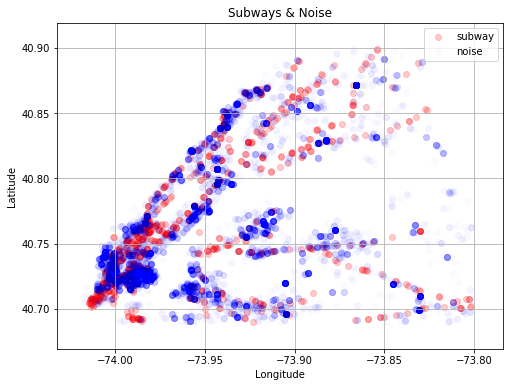

In [49]:
#Lets visualize this data! 
#A simple scatter plot with our data
plt.figure(figsize=(8,6))
#We make subway's appear more frequent by making red dots darker!
plt.scatter(subway_nyc['Longitude'], subway_nyc['Latitude'], color='red',alpha=0.2,label = 'subway')
plt.scatter(noise2009['Longitude'], noise2009['Latitude'], color='blue',alpha=0.02,label = 'noise')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Subways & Noise')
plt.grid()

plt.legend()
plt.show()

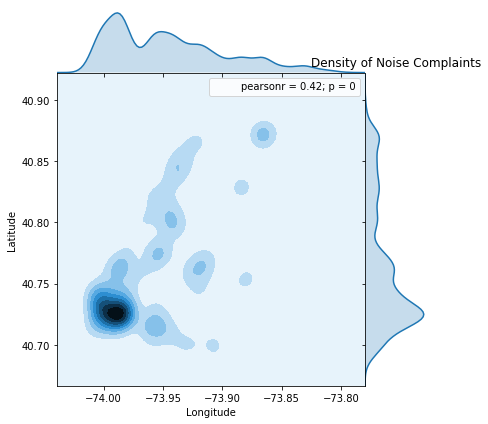

In [50]:
#And some other plots of a probability distribution
sns.jointplot(noise2009.Longitude, noise2009.Latitude, kind='kde',space=0)
plt.title('Density of Noise Complaints')
plt.show()

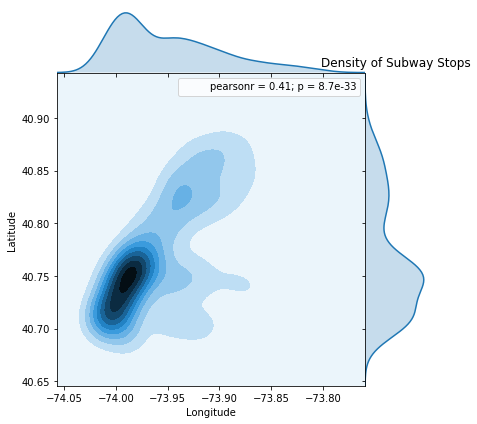

In [52]:
sns.jointplot(subway_nyc.Longitude, subway_nyc.Latitude, kind='kde',space=0)
plt.title('Density of Subway Stops')
plt.show()